In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
upload=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (3).xlsx


In [ ]:
flight = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [ ]:
flight

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
del flight['ID#']
flight

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


##**EDA**

In [ ]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


##**NORMALIZATION**

In [ ]:
def minmax_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return (x)

In [ ]:
df_norm = minmax_func(flight)

In [ ]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [ ]:
df_norm.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


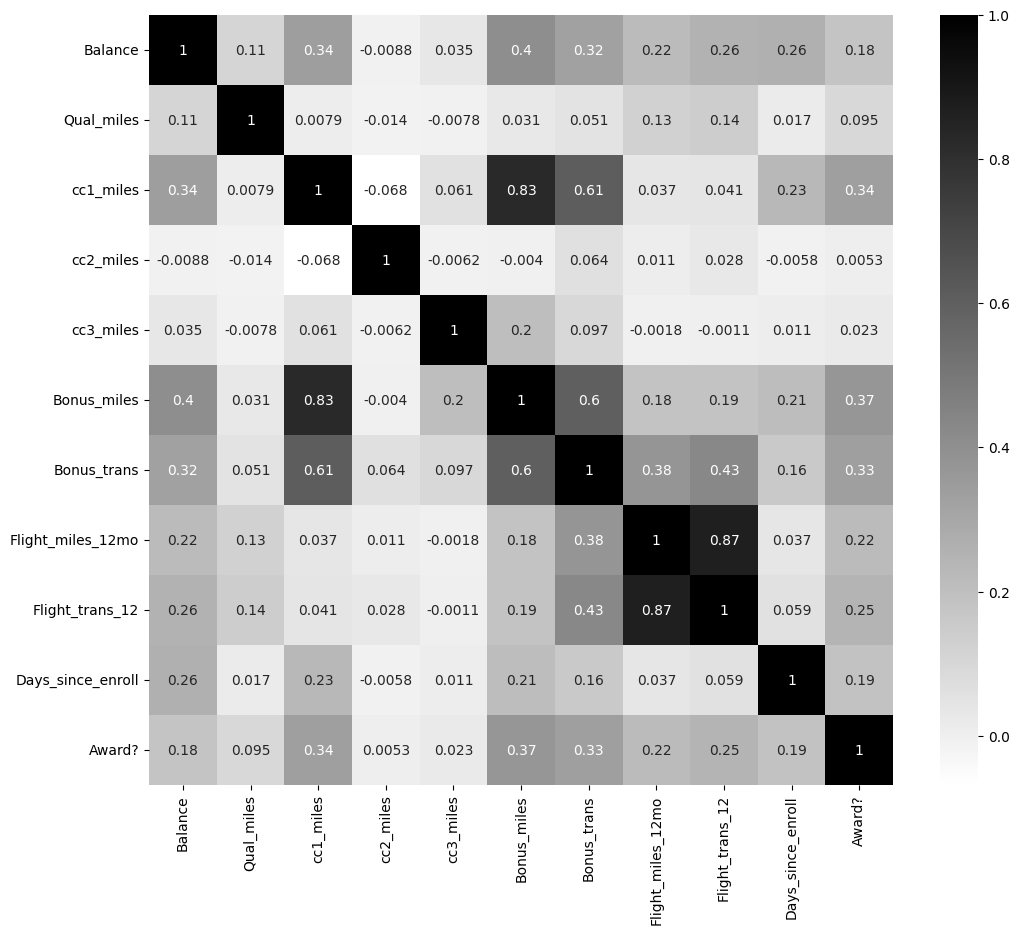

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt. figure(figsize=(12,10))
cor = df_norm.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.binary)
plt.show()

In [ ]:
def correlation(dataset, threshold):
  col_corr = set() # Set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
        colname = corr_matrix.columns[i] # getting the name of column
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(df_norm, 0.8)
len(set (corr_features))

2

In [ ]:
corr_features

{'Bonus_miles', 'Flight_trans_12'}

In [ ]:
df_norm.drop(corr_features, axis = 1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.011628,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.023256,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.046512,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.011628,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.302326,0.067398,0.835905,1.0
...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.046512,0.006490,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.058140,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.093023,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.011628,0.016225,0.168676,0.0


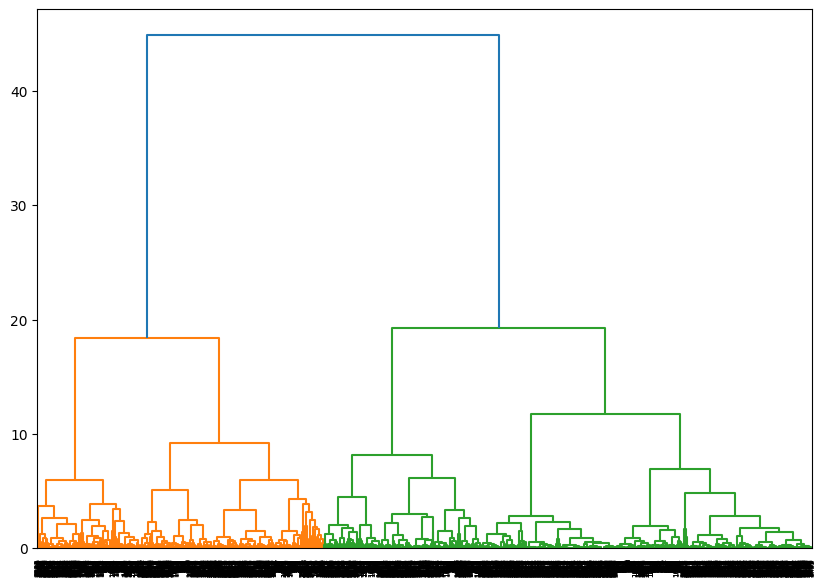

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))
#Other Methods : single , complete , centroid , average

In [ ]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
hclusters = hclusters.fit_predict(df_norm)
hclusters

array([1, 1, 1, ..., 0, 4, 4])

In [ ]:
flight['h_cluster_id']= hclusters
flight

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [ ]:
flight.groupby ('h_cluster_id').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_cluster_id,,,,,,,,,,,
0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


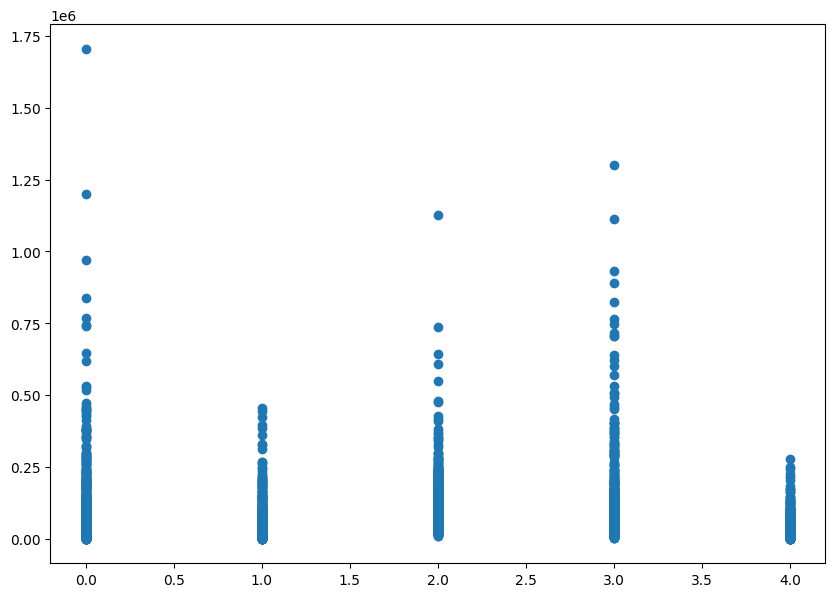

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(flight['h_cluster_id'],flight['Balance'])

## **KMEANS**

###**ELBOW CHART**

In [ ]:
from sklearn.cluster import KMeans

[47975.99999999994, 39390.85026444999, 34875.961143781074, 30794.863679993177, 27093.176038223573, 23643.684733542985, 20786.53293922257, 19189.16327155686, 16660.13484075801, 15342.618348840806]


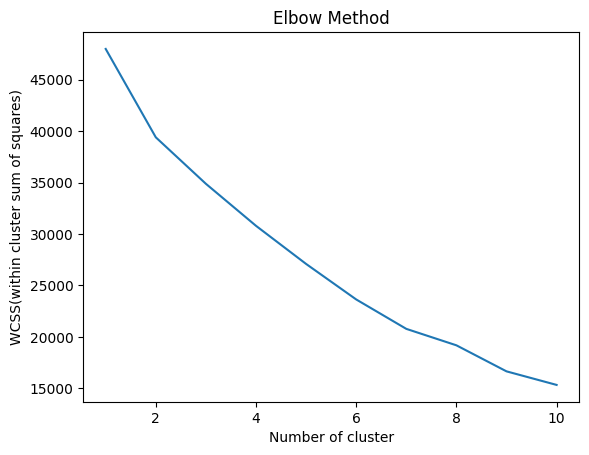

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#WCSS(within cluster sum of square)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS(within cluster sum of squares)')
plt.show()

In [ ]:
k_mean_clust = KMeans(4, random_state=0)
k_mean_clust.fit(x)

KMeans(n_clusters=4, random_state=0)

In [ ]:
k_mean_clust.labels_

array([0, 0, 0, ..., 0, 2, 2], dtype=int32)

In [ ]:
flight['Kmean_clust_id'] = k_mean_clust.labels_
flight

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id,Kmean_clust_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2


In [ ]:
flight.groupby('Kmean_clust_id').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmean_clust_id,,,,,,,,,,,,
0,53541.934886,105.126901,1.462452,1.023764,1.000475,7095.510932,8.470057,243.846008,0.743821,4713.404943,0.389259,0.740970
1,135702.204126,147.755700,4.100977,1.002172,1.052117,48702.408252,19.929425,383.343105,1.154180,4925.167210,0.585233,2.412595
2,33884.861279,117.633293,1.275030,1.000000,1.000000,4668.905911,7.301568,189.709288,0.521110,1597.951749,0.000000,3.645356
3,197291.020690,838.110345,2.241379,1.041379,1.000000,33847.200000,28.737931,5630.227586,16.779310,4774.717241,0.848276,1.551724


#**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
db_flight = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
db_flight

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
stscaler = StandardScaler()
X=stscaler.fit_transform(db_flight)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
dbscan = DBSCAN(eps=4, min_samples=300)
dbscan.fit(X)

DBSCAN(eps=4, min_samples=300)

In [ ]:
dbscan.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
flight['DB_Cluster_id']=dbscan.labels_
flight

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id,Kmean_clust_id,DB_Cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2,0


In [ ]:
flight[flight['DB_Cluster_id']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id,Kmean_clust_id,DB_Cluster_id
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0,3,-1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,3,3,-1
70,84409,5031,2,1,1,15436,16,1150,4,7766,0,2,0,-1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,3,1,-1
117,969559,0,1,1,1,2500,3,1000,2,7718,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,374613,0,1,2,1,23592,31,5000,14,3463,1,0,3,-1
3837,8150,0,1,2,1,14135,41,500,2,1676,1,0,0,-1
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,3,3,-1
3851,11947,0,1,2,1,8099,14,1000,2,1656,1,0,0,-1


In [ ]:
(len(flight[flight['DB_Cluster_id']==-1])/len(flight))*100

3.8259564891222806

In [ ]:
X=metrics.silhouette_score(X,dbscan.labels_)
X

0.6427350598621433

### **Clustering [DBSCAN , KMEANS , AGGLOMERATIVE]**

In [ ]:
flight.iloc[:,[-1,-2,-3]]

,DB_Cluster_id,Kmean_clust_id,h_cluster_id
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,3
...,...,...,...
3994,0,0,0
3995,0,0,0
3996,0,0,0
3997,0,2,4
